In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
rcParams['figure.figsize']= 5,5
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bonus_dataset/data_64.csv")
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f12249,f12250,f12251,f12252,f12253,f12254,f12255,f12256,f12257,f12258,f12259,f12260,f12261,f12262,f12263,f12264,f12265,f12266,f12267,f12268,f12269,f12270,f12271,f12272,f12273,f12274,f12275,f12276,f12277,f12278,f12279,f12280,f12281,f12282,f12283,f12284,f12285,f12286,f12287,labels
0,133,97,89,125,91,82,123,91,83,123,94,87,121,93,87,121,97,90,123,99,93,119,96,90,119,97,91,124,101,93,127,104,93,129,104,94,133,108,98,130,...,52,50,49,58,56,55,59,54,55,61,56,57,57,52,53,34,30,30,24,20,19,29,25,24,28,24,23,28,24,24,30,25,26,30,25,26,31,26,27,1
1,240,246,245,245,251,250,250,254,253,252,254,254,252,254,254,253,255,255,250,254,254,247,252,251,245,250,252,230,235,242,208,211,229,216,218,247,165,165,207,160,...,242,236,234,234,230,228,228,223,222,230,224,221,227,219,216,228,217,213,224,209,205,223,204,199,225,206,201,220,207,199,214,208,198,215,215,211,194,198,204,1
2,220,211,211,219,215,213,220,218,216,224,221,219,228,223,222,231,226,224,231,228,226,234,230,229,237,233,231,239,235,234,239,236,235,238,237,235,238,237,235,238,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
3,85,83,100,103,101,118,114,115,132,128,133,150,143,151,169,145,157,178,139,154,178,135,151,177,128,144,171,124,137,165,127,137,164,129,135,163,138,143,169,138,...,56,50,71,64,50,78,65,51,81,63,49,84,63,48,86,63,48,91,65,49,97,68,52,103,69,54,107,66,52,107,69,55,113,71,57,118,67,55,117,1
4,46,52,65,36,42,55,27,33,46,24,31,44,25,33,46,31,38,53,42,49,64,50,58,74,50,59,75,49,56,75,43,52,72,42,50,73,51,59,83,58,...,208,193,198,253,247,255,243,245,254,188,196,207,191,205,211,223,239,241,210,220,225,211,204,222,201,195,211,188,183,196,119,114,124,71,67,73,58,52,56,1


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f12248,f12249,f12250,f12251,f12252,f12253,f12254,f12255,f12256,f12257,f12258,f12259,f12260,f12261,f12262,f12263,f12264,f12265,f12266,f12267,f12268,f12269,f12270,f12271,f12272,f12273,f12274,f12275,f12276,f12277,f12278,f12279,f12280,f12281,f12282,f12283,f12284,f12285,f12286,f12287
0,133,97,89,125,91,82,123,91,83,123,94,87,121,93,87,121,97,90,123,99,93,119,96,90,119,97,91,124,101,93,127,104,93,129,104,94,133,108,98,130,...,48,52,50,49,58,56,55,59,54,55,61,56,57,57,52,53,34,30,30,24,20,19,29,25,24,28,24,23,28,24,24,30,25,26,30,25,26,31,26,27
1,240,246,245,245,251,250,250,254,253,252,254,254,252,254,254,253,255,255,250,254,254,247,252,251,245,250,252,230,235,242,208,211,229,216,218,247,165,165,207,160,...,239,242,236,234,234,230,228,228,223,222,230,224,221,227,219,216,228,217,213,224,209,205,223,204,199,225,206,201,220,207,199,214,208,198,215,215,211,194,198,204
2,220,211,211,219,215,213,220,218,216,224,221,219,228,223,222,231,226,224,231,228,226,234,230,229,237,233,231,239,235,234,239,236,235,238,237,235,238,237,235,238,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,85,83,100,103,101,118,114,115,132,128,133,150,143,151,169,145,157,178,139,154,178,135,151,177,128,144,171,124,137,165,127,137,164,129,135,163,138,143,169,138,...,74,56,50,71,64,50,78,65,51,81,63,49,84,63,48,86,63,48,91,65,49,97,68,52,103,69,54,107,66,52,107,69,55,113,71,57,118,67,55,117
4,46,52,65,36,42,55,27,33,46,24,31,44,25,33,46,31,38,53,42,49,64,50,58,74,50,59,75,49,56,75,43,52,72,42,50,73,51,59,83,58,...,62,208,193,198,253,247,255,243,245,254,188,196,207,191,205,211,223,239,241,210,220,225,211,204,222,201,195,211,188,183,196,119,114,124,71,67,73,58,52,56


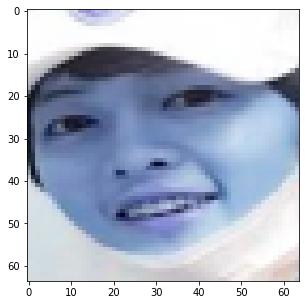

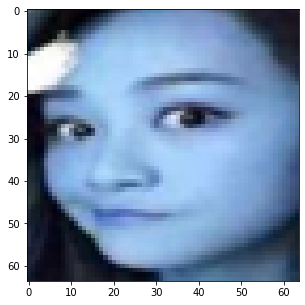

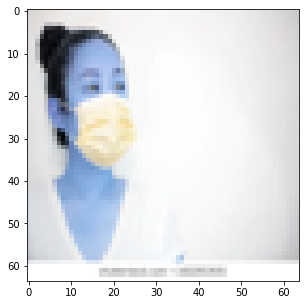

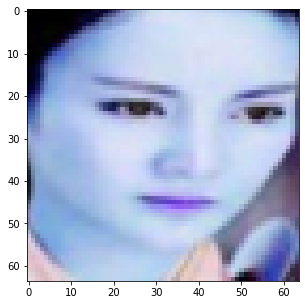

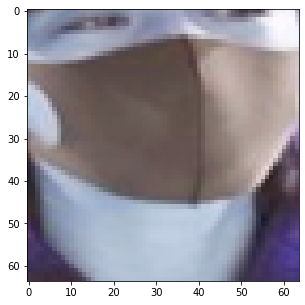

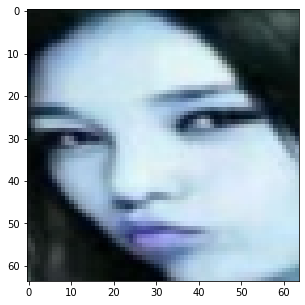

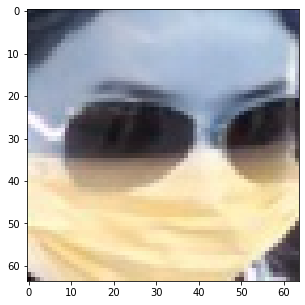

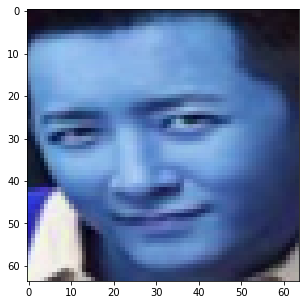

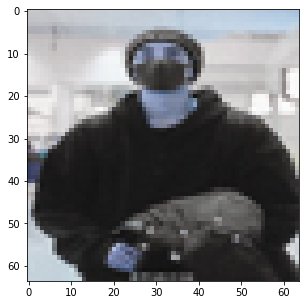

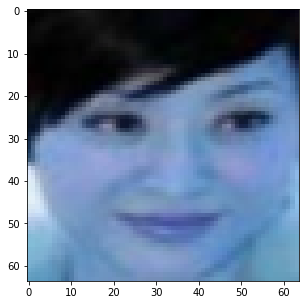

In [ ]:
for i in range(1,6):
  plt.figure(figsize=(5,5))
  plt.imshow(np.array(x)[i].reshape(64,64,3))
  plt.show()
  plt.figure(figsize=(5,5))
  plt.imshow(np.array(x)[-i].reshape(64,64,3))
  plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True ,random_state=42)

In [ ]:
print(np.unique(y_train , return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([4020,  624]))
(array([0, 1]), array([980, 181]))


In [ ]:
#PCA conversion
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_trn = pca.fit_transform(x_train)
x_tst = pca.transform(x_test)
y_trn = y_train
y_tst = y_test

In [243]:
def give_roc(model,x_test,y_test):
  a = model.predict(x_test)
  fpr , tpr , _ = roc_curve(y_test,a)
  plt.plot(fpr,tpr,label = f'auc = {auc(fpr,tpr)}')
  plt.legend()
  plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf1  = MLPClassifier()
clf1.fit(x_trn,y_trn)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("Accuracy",clf1.score(x_tst,y_tst))
print("confusion matrix is \n",confusion_matrix(y_tst,clf1.predict(x_tst)))

Accuracy 0.967269595176572
confusion matrix is 
 [[960  20]
 [ 18 163]]


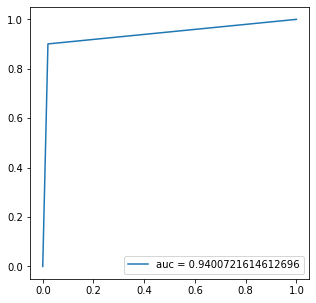

In [246]:
give_roc(clf1,x_tst,y_tst)

In [ ]:
cv_score = cross_val_score(estimator=MLPClassifier(),X=x_trn,y=y_trn,cv=5)
cv_score


array([0.94510226, 0.96340151, 0.95586652, 0.94510226, 0.95581897])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


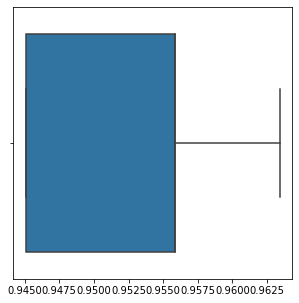

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(cv_score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf2=KNeighborsClassifier(n_neighbors=12)
clf2.fit(x_trn,y_trn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
print("Accuracy",clf2.score(x_tst,y_tst))
print("confusion matrix is \n",confusion_matrix(y_tst,clf2.predict(x_tst)))

Accuracy 0.9069767441860465
confusion matrix is 
 [[980   0]
 [108  73]]


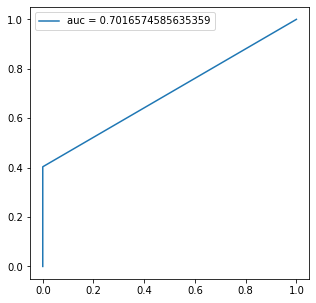

In [247]:
give_roc(clf2,x_tst,y_tst)

In [ ]:
estimators ={i:KNeighborsClassifier(n_neighbors=i) for i in range(5,50,5)}
estimators

{5: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 10: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform'),
 15: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                      weights='uniform'),
 20: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                      weights='uniform'),
 25: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                      weights='uniform'),
 30: KNeighborsClassif

In [ ]:
accuracy_list = []
for C,model in estimators.items():
  model.fit(x_trn,y_trn)
  accuracy_list.append(model.score(x_tst,y_tst))

Text(0, 0.5, 'accuracy')

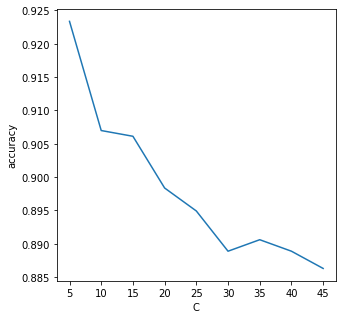

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(estimators.keys()),accuracy_list)
plt.xlabel('C')
plt.ylabel('accuracy')

In [ ]:
cv_score4 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=12),X=x_trn,y=y_trn,cv=5)
cv_score4

array([0.90527449, 0.89881593, 0.90958019, 0.90204521, 0.90517241])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


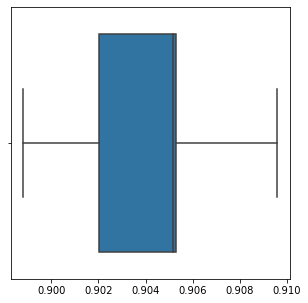

In [ ]:
sns.boxplot(cv_score4)

(4644, 214)

In [ ]:
x_tst.shape

(1161, 214)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
svm_clf=Pipeline([
    ("standardscaler",StandardScaler()),
    ('svc',SVC(gamma="auto",probability=True,kernel="rbf",C=10,decision_function_shape='ovo'))])

In [ ]:
svm_clf.fit(x_trn,y_trn)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
print('Accuracy',svm_clf.score(x_tst,y_tst))
print("confusion matrix is \n",confusion_matrix(y_tst,svm_clf.predict(x_tst)))

Accuracy 0.9819121447028424
confusion matrix is 
 [[972   8]
 [ 13 168]]


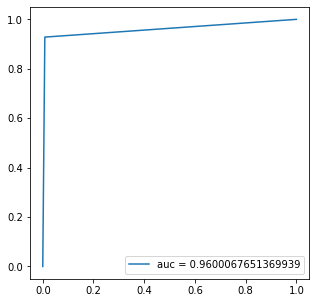

In [248]:
give_roc(svm_clf,x_tst,y_tst)

In [ ]:
cv_score1 = cross_val_score(estimator=svm_clf,X=x_trn,y=y_trn,cv=5)
cv_score1

array([0.9795479 , 0.98062433, 0.98062433, 0.98170075, 0.9762931 ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


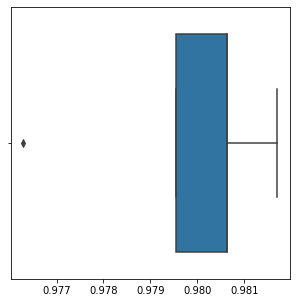

In [ ]:
sns.boxplot(cv_score1)

In [ ]:
estimators ={i:Pipeline([("standardscaler",StandardScaler()),('svc',SVC(gamma="auto",kernel="rbf",C=i,decision_function_shape='ovo'))]) for i in range(2,50,5)} #{'2':SVC(C=2),'3':SVC(C=3)}
estimators

{2: Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=2, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovo', degree=3,
                      gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), 7: Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=7, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovo', degree=3,
                      gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                      random_state=None, shrinking=True, tol=0.001,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for C,model in estimators.items():
  model.fit(x_trn,y_trn)
  a = model.predict(x_tst)
  accuracy_list.append(accuracy_score(a,y_tst))

Text(0, 0.5, 'accuracy')

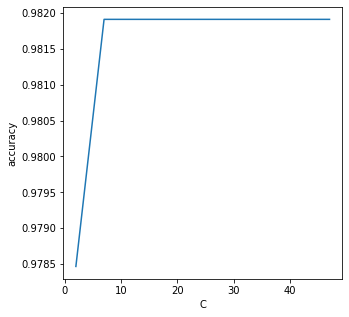

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(estimators.keys()),accuracy_list)
plt.xlabel('C')
plt.ylabel('accuracy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clfR= RandomForestClassifier(n_estimators=190)
clfR.fit(x_trn,y_trn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Acuuracy",clfR.score(x_tst,y_tst))
print("confusion matrix is \n",confusion_matrix(y_tst,clfR.predict(x_tst)))

Acuuracy 0.9405684754521964
confusion matrix is 
 [[979   1]
 [ 68 113]]


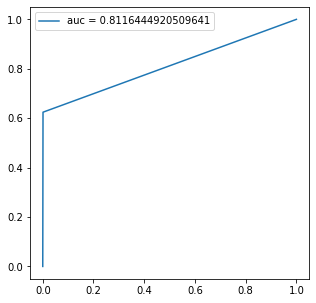

In [250]:
give_roc(clfR,x_tst,y_tst)

In [ ]:
cv_score2 = cross_val_score(estimator=RandomForestClassifier(n_estimators=190),X=x_trn,y=y_trn,cv=5)
cv_score2

array([0.95048439, 0.94725511, 0.94617869, 0.93756728, 0.94288793])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


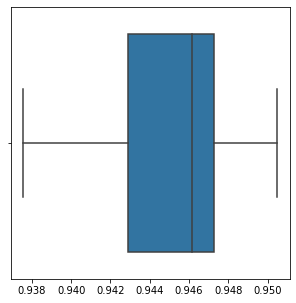

In [ ]:
sns.boxplot(cv_score2)

In [ ]:
est = {i:RandomForestClassifier(n_estimators = i) for i in range(50,300,20)}

In [ ]:
l = []
for i,estimator in est.items():
  estimator.fit(x_trn,y_trn)
  a = estimator.predict(x_tst)
  l.append(accuracy_score(a,y_tst))

Text(0, 0.5, 'accuracy')

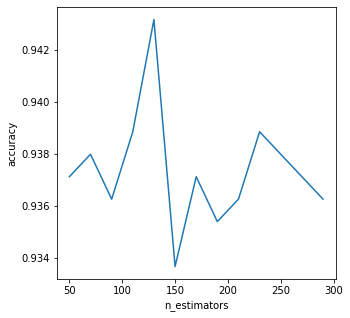

In [ ]:
sns.lineplot(x=list(est.keys()),y=l)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')